# 5. 영화리뷰 텍스트 감성분석하기

## 5-1. 들어가며

매일 새로운 주제를 공부해 나가시는 건 어떠신가요? 어떤 분에게는 벅찰 수도 있고, 어떤 분에게는 즐거움의 연속일 수 있습니다. 그렇지만 이렇게 짧은 시간 동안 다양한 도메인에 대해 학습을 하는 경험은 쉽지 않으니 조금만 더 힘을 내서 따라와 주시면 좋겠습니다.

오늘은 자연어 처리에 주로 활용되는 RNN(Recurrent Neural Network)에 대해 배워볼 예정입니다. 그리고 컴퓨터 비전에서만 사용되는 줄 알았던 CNN(Convolutional Neural Network)이 자연어 처리에서 사용될 수도 있다는 것을 알게 되실 것입니다.
또한, 이 모델들의 구조를 학습하고 이를 활용하여 우리가 네이버나 다음 영화에서 확인할 수 있는 영화리뷰에 대한 감성분석(sentiment analysis) 를 진행해 보도록 하겠습니다.

그럼 지금부터 시작해 보겠습니다.

### 학습 목표
---
- 텍스트 데이터를 머신러닝 입출력용 수치데이터로 변환하는 과정을 이해합니다.
- RNN의 특징을 이해하고 시퀀셜한 데이터를 다루는 방법을 이해합니다.
- 1-D CNN으로도 텍스트를 처리할 수 있음을 이해합니다.
- IMDB와 네이버 영화리뷰 데이터셋을 이용한 영화리뷰 감성 분류 실습을 진행합니다.

### 학습 내용
---
1. 텍스트 감정분석의 유용성
    - 텍스트 데이터를 통해 얻을 수 있는 정보와 활용에 대해 살펴봅니다.
2. 텍스트 데이터의 특징
3. 텍스트 데이터의 특징 (1) 텍스트를 숫자로 표현하는 방법
4. 텍스트 데이터의 특징 (2) Embedding 레이어의 등장
5. 시퀀스 데이터를 다루는 RNN
    - 시퀀스 데이터와 RNN의 구조에 대해 알아봅니다.
6. 꼭 RNN이어야 할까?
    - 실습과 함께 RNN의 효율성에 대해 살펴봅니다.
7. IMDB 영화리뷰 감성분석 (1) IMDB 데이터셋 분석
8. IMDB 영화리뷰 감성분석 (2) 딥러닝 모델 설계와 훈련
9. IMDB 영화리뷰 감성분석 (3) Word2Vec의 적용

## 5-2. 텍스트 감정분석의 유용성

오늘 우리는 딥러닝을 통해 텍스트에 담긴 감성을 분석(Sentimental Analysis)하는 방법을 배워 볼 것입니다. 구체적으로는 IMDB나 네이버 영화 리뷰 텍스트에 담긴 이용자의 감성이 긍정적인지 혹은 부정적인지를 분류(Classification) 할 수 있는 딥러닝 모델을 만들어 볼 것입니다.

그런데 딥러닝을 이용한 텍스트 감성분석은 어떤 점에서 유용할까요? 이 막연한 질문을 좀 더 세부적인 질문으로 잘게 쪼개면 다음과 같은 질문들로 나눠볼 수 있을 것입니다.

- 텍스트 데이터만이 가지고 있는 정보적 특성과 가치는 어떤 것일까요?
- 감성분석 등 텍스트 분류 모델이 다른 데이터 분석 업무에 어떤 점에서 도움을 주나요?
- 텍스트 데이터 분석의 기술적 어려움은 무엇인가요?
- 텍스트 분류 작업을 하는데 딥러닝이 적용되면 어떤 점에서 유리해질까요?

이 질문들에 답을 제공하는 유용한 아티클 하나를 소개하겠습니다. 이 아티클을 정독하시면서 위 질문들에 대한 답을 찾아서 스스로 정리해 보시기 바랍니다. 하지만 정답이 있는 것은 아닙니다.
이 아티클을 통해 산업 현장에서 텍스트 분류가 실제로 활용되는 구체적인 사례도 확인할 수 있습니다.

동아비즈니스리뷰 감성분석 활용 사례 기고 (https://dbr.donga.com/article/view/1202/article_no/8891/ac/magazine)

## 5-3. 텍스트 데이터의 특징

인공지능 모델을 입력과 출력이 정해진 함수라고 생각해 봅시다. 예를 들어 MNIST 숫자 분류기 모델이라면 이미지 파일을 읽어 들인 매트릭스가 입력이 되고, 이미지 파일에 쓰여 있는 실제 숫자 값이 출력이 되는 함수가 될 것입니다.
이제 텍스트 문장을 입력으로 받아서 그 의미가 긍정이면 1, 부정이면 0을 출력하는 인공지능 모델을 만든다고 생각해 봅시다. 이 모델을 만들기 위해서는 숫자 분류기를 만들 때는 생각할 필요가 없었던 2가지 문제가 생깁니다.

- 텍스트를 어떻게 숫자 행렬로 표현할 수 있나요?
- 텍스트에는 순서가 중요합니다. 입력 데이터의 순서를 인공지능 모델에 어떻게 반영해야 하나요?

위 두 문제를 해결하기 위해, 일반적으로 Encoding 과 Embedding이라는 두 가지 기법을 사용합니다.
각각의 방식을 어떻게 수행하며, 어떤 차이를 가지는지 살펴보겠습니다.

### 5-4. 텍스트 데이터의 특징 (1) 텍스트를 숫자로 표현하는 방법

인공지능 모델의 입력이 될 수 있는 것은 0과 1의 비트로 표현 가능한 숫자만으로 이루어진 매트릭스일 뿐입니다.
아주 단순히, A=0, B=1, ..., Z=25 라고 숫자를 임의로 부여한다고 해봅시다.
그러면 의미적으로 A와 B는 1만큼 멀고, A와 Z는 25만큼 멀까요? 그렇지 않습니다. 텍스트의 중요한 특징은 그 자체로는 기호일 뿐이며, 텍스트가 내포하는 의미를 기호가 직접 내포하지 않는다는 점입니다.

하지만 우리는 우선 단어 사전을 만들어 볼 수는 있습니다. 우리가 사용하는 국어, 영어 사전에는 단어와 그 의미 설명이 짝지어져 있습니다.
우리가 하려는 것은 단어와 그 단어의 의미를 나타내는 벡터를 짝지어 보려고 하는 것입니다. 그런데 그 벡터는 어디서 가져올까요? 그렇습니다. 우리는 딥러닝을 통해 그 벡터를 만들어 낼 수 있습니다.

아래와 같이 단 3개의 짧은 문장으로 이루어진 텍스트 데이터를 처리하는 간단한 예제를 생각해 보겠습니다.

> i feel hungry  
i eat lunch  
now i feel happy

In [1]:
# 처리해야 할 문장을 파이썬 리스트에 옮겨 담았습니다.
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

# 파이썬 split() 메소드를 이용해 단어 단위로 문장을 쪼개 봅니다.
word_list = 'i feel hungry'.split()
print(word_list)

['i', 'feel', 'hungry']


우리의 텍스트 데이터로부터 사전을 만들기 위해 모든 문장을 단어 단위로 쪼갠 후에 파이썬 딕셔너리(dict) 자료구조로 표현해 보겠습니다.

In [2]:
index_to_word={}  # 빈 딕셔너리를 만들어서

# 단어들을 하나씩 채워 봅니다. 채우는 순서는 일단 임의로 하였습니다. 그러나 사실 순서는 중요하지 않습니다. 
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어줍니다. 
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

print(index_to_word)

{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}


단어 10개짜리 작은 딕셔너리가 만들어졌습니다. 하지만 우리가 가진 텍스트 데이터를 숫자로 바꿔 보려고 하는데, 텍스트를 숫자로 바꾸려면 위의 딕셔너리가 {텍스트:인덱스} 구조여야 합니다.

In [3]:
word_to_index={word:index for index, word in index_to_word.items()}
print(word_to_index)

{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}


In [4]:
print(word_to_index['feel'])  # 단어 'feel'은 숫자 인덱스 4로 바뀝니다.

4


In [5]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수를 만들어 봅시다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

print(get_encoded_sentence('i eat lunch', word_to_index))

[1, 3, 6, 7]


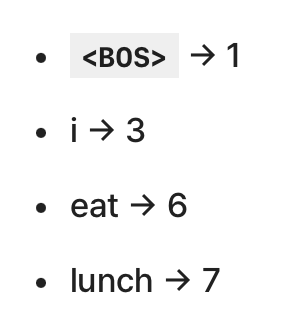

이렇게 텍스트 혹은 범주형 데이터를 정수에 대응하는 방법을 ‘정수 인코딩’ 이라고 합니다. 인코딩은 이 외에도 원-핫 인코딩, 멀티-핫 인코딩 등이 있습니다.

In [6]:
# 여러 개의 문장 리스트를 한꺼번에 숫자 텐서로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# sentences=['i feel hungry', 'i eat lunch', 'now i feel happy'] 가 아래와 같이 변환됩니다. 
encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]


In [7]:
# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

print(get_decoded_sentence([1, 3, 4, 5], index_to_word))

i feel hungry


In [8]:
# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

# encoded_sentences=[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 가 아래와 같이 변환됩니다.
print(get_decoded_sentences(encoded_sentences, index_to_word))

['i feel hungry', 'i eat lunch', 'now i feel happy']


## 5-5. 텍스트 데이터의 특징 (2) Embedding 레이어의 등장

텍스트가 숫자로 변환되어 인공지능 모델의 입력으로 사용될 수 있게 되었지만, 이것으로 충분하지는 않습니다. 'i feel hungry'가 1, 3, 4, 5 로 변환되었지만 이 벡터는 텍스트에 담긴 언어의 의미와 대응되는 벡터가 아니라 임의로 부여된 단어의 순서에 불과합니다. 우리가 하려는 것은 단어와 그 단어의 의미를 나타내는 벡터를 짝짓는 것이었습니다. 그래서 단어의 의미를 나타내는 벡터를 훈련 가능한 파라미터로 놓고 이를 딥러닝을 통해 학습해서 최적화하게 됩니다. Tensorflow, Pytorch 등의 딥러닝 프레임워크들은 이러한 의미 벡터 파라미터를 구현한 Embedding 레이어를 제공합니다.

> 임베딩(Embedding)이란?  
자연어 처리(Natural Language Processing)분야에서 임베딩(Embedding)은 사람이 쓰는 자연어를 기계가 이해할 수 있는 숫자형태인 vector로 바꾼 결과 혹은 그 일련의 과정 전체를 의미한다. 가장 간단한 형태의 임베딩은 단어의 빈도를 그대로 벡터로 사용하는 것이다.
임베딩을 통해 할수있는 것은 단어나 문장 사이의 코사인 유사도가 가장 높은 단어를 구하는 등의 계산, 단어들 사이의 의미/문법적 정보 도출 벡터 간 연산으로 단어 사이 문법적 관계 도출, 전이 학습(transfer learning)
임베딩은 다른 딥러닝 모델의 입력값으로 자주 쓰이고, 품질 좋은 임베딩을 쓸수록 모델의 성능이 좋아집니다.

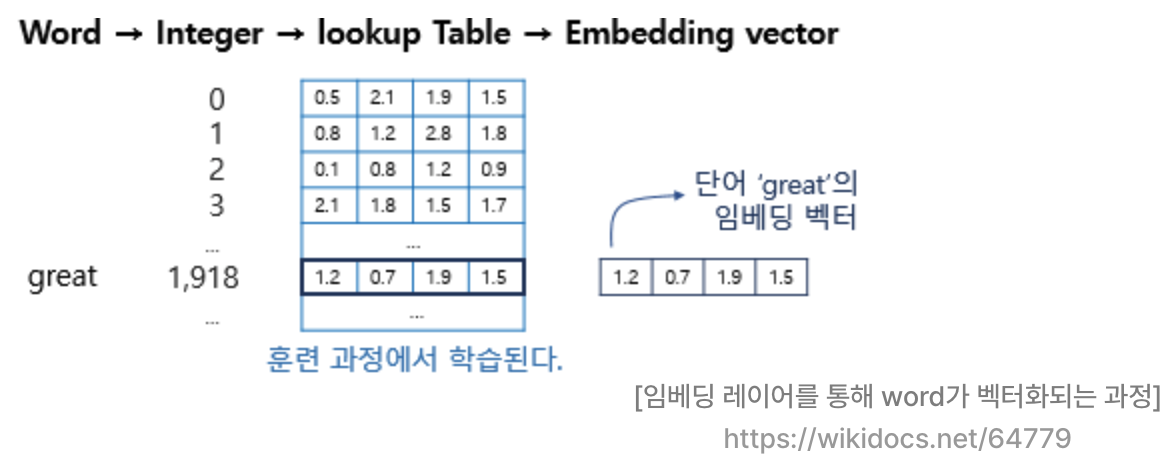

위 그림에서 word_to_index('great')는 1918입니다. 그러면 'great'라는 단어의 의미 공간상의 워드 벡터(word vector)는 Lookup Table 형태로 구성된 Embedding 레이어의 1919번째 벡터가 됩니다. 위 그림에서는 1.2, 0.7, 1.9, 1.5가 됩니다.
 Embedding 레이어를 활용하여 이전 스텝의 텍스트 데이터를 워드 벡터 텐서 형태로 다시 표현해 보겠습니다.

In [12]:
# 아래 코드는 그대로 실행하시면 에러가 발생할 것입니다. 

import numpy as np
import tensorflow as tf
import os

vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 위 그림과 같이 4차원의 워드 벡터를 가정합니다. 

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# 숫자로 변환된 텍스트 데이터 [[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 에 Embedding 레이어를 적용합니다. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype='object')
output = embedding(raw_inputs)
print(output)

ValueError: setting an array element with a sequence.

실행해 보니 에러가 발생합니다. 왜 그럴까요?

주의해야 할 점이 있습니다. Embedding 레이어의 인풋이 되는 문장 벡터는 그 길이가 일정해야 합니다. raw_inputs의 3개 벡터의 길이는 각각 4, 4, 5입니다.
Tensorflow에서는 tf.keras.preprocessing.sequence.pad_sequences라는 편리한 함수를 통해 문장 벡터 뒤에 패딩(<PAD>)을 추가하여 길이를 일정하게 맞춰주는 기능을 제공합니다.

In [13]:
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
print(raw_inputs)

[[1 3 4 5 0]
 [1 3 6 7 0]
 [1 8 3 4 9]]


짧은 문장 뒤쪽이 0으로 채워지는 것을 확인할 수 있습니다. <PAD> 가 0에 매핑되어 있다는 걸 기억하세요.

그러면 위에 시도했던 output = embedding(raw_inputs)을 다시 시도해 봅시다.

In [14]:
vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4    # 그림과 같이 4차원의 워드 벡터를 가정합니다.

embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

# tf.keras.preprocessing.sequence.pad_sequences를 통해 word vector를 모두 일정 길이로 맞춰주어야 
# embedding 레이어의 input이 될 수 있음에 주의해 주세요. 
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype=object)
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=5)
output = embedding(raw_inputs)
print(output)

tf.Tensor(
[[[ 0.03567468 -0.02190598 -0.03785193  0.00398916]
  [-0.00349921 -0.01326282 -0.01724265  0.03596422]
  [-0.00091658  0.03081265 -0.03328949  0.03832588]
  [-0.00251343  0.00776001 -0.01712073  0.02438769]
  [-0.03664175  0.01198594 -0.01698389 -0.04453072]]

 [[ 0.03567468 -0.02190598 -0.03785193  0.00398916]
  [-0.00349921 -0.01326282 -0.01724265  0.03596422]
  [ 0.04826101 -0.03420637 -0.04965102  0.01973922]
  [ 0.02343572  0.00947661  0.03774187  0.0248981 ]
  [-0.03664175  0.01198594 -0.01698389 -0.04453072]]

 [[ 0.03567468 -0.02190598 -0.03785193  0.00398916]
  [-0.018085   -0.02304014 -0.01426346 -0.02659539]
  [-0.00349921 -0.01326282 -0.01724265  0.03596422]
  [-0.00091658  0.03081265 -0.03328949  0.03832588]
  [-0.04372552 -0.0347022   0.04252386 -0.02977748]]], shape=(3, 5, 4), dtype=float32)


## 5-6. 시퀀스 데이터를 다루는 RNN

텍스트 데이터를 다루는 데 주로 사용되는 딥러닝 모델은 바로 Recurrent Neural Network(RNN)입니다. RNN은 시퀀스(Sequence) 형태의 데이터를 처리하기에 최적인 모델로 알려져 있습니다.

텍스트 데이터도 시퀀스 데이터라는 관점으로 해석할 수 있습니다만, 시퀀스 데이터의 정의에 가장 잘 어울리는 것은 음성 데이터가 아닐까 합니다.
 시퀀스 데이터란 바로 입력이 시간 축을 따라 발생하는 데이터입니다. 예를 들어 이전 스텝의 'i feel hungry'라는 문장을 누군가가 초당 한 단어씩, 3초에 걸쳐 이 문장을 발음했다고 합시다.

> at time=0s : 듣는이의 귀에 들어온 input='i'  
at time=1s : 듣는이의 귀에 들어온 input='feel'  
at time=2s : 듣는이의 귀에 들어온 input='hungry'  

time=1s인 시점에서 입력으로 받은 문장은 'i feel' 까지입니다. 그다음에 'hungry'가 올지, 'happy'가 올지 알 수 없는 상황입니다.
 RNN은 그런 상황을 묘사하기에 가장 적당한 모델 구조를 가지고 있습니다. 왜냐하면 RNN은 시간의 흐름에 따라 새롭게 들어오는 입력에 따라 변하는 현재 상태를 묘사하는 state machine으로 설계되었기 때문입니다.

State가 무엇인지 이해를 돕기 위해 다음 그림을 보면서 질문에 대답해 봅시다.

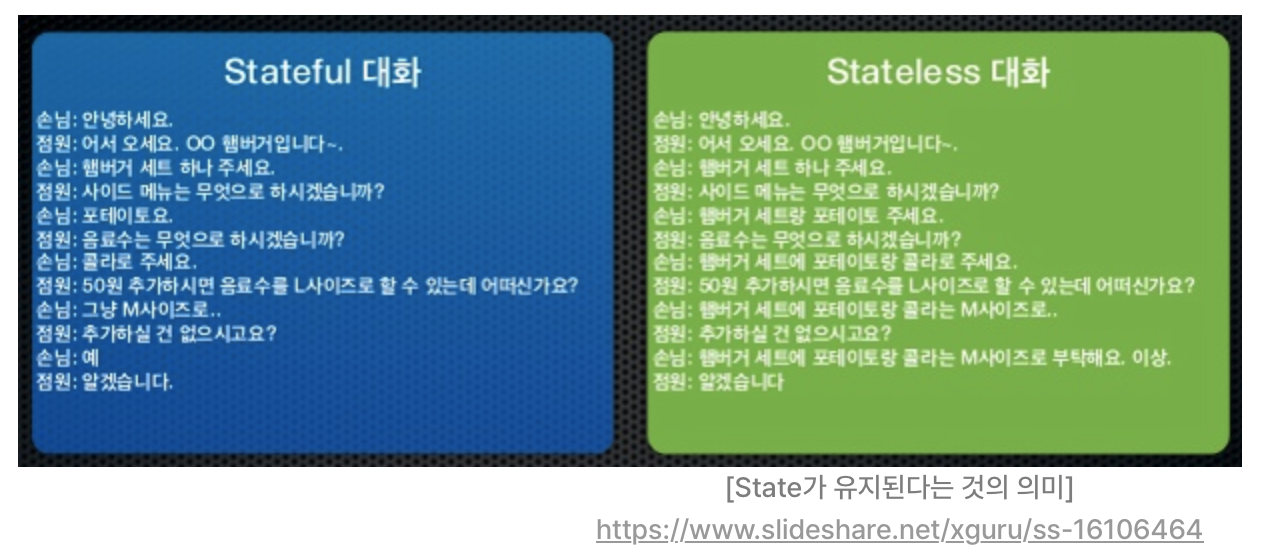

Stateful한 대화에서는 손님이 이전 시점에 어떤 선택을 했는지 직원이 기억을 하지만, Stateless한 대화에서는 직원이 기억하지 못한다. 그래서 손님 스스로 본인이 이전 시점에 했던 선택을 모두 기억하고 있다가 직원에게 매번 새롭게 전달해야 한다. 손님의 이전 주문내역을 기억하는 직원은 stateful하고, 그렇지 못한 직원은 stateless하다.

In [15]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

/Users/henry/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, None, 4)        │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 8)              │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 537 (2.10 KB)

 Trainable params: 537 (2.10 KB)

 Non-trainable params: 0 (0.00 B)

시퀀스 자료형과 RNN에 대해 조금더 쉽게 이해하고 싶다면 아래 링크(24분~55분)를 참고해주세요!  
시퀀스 자료형과 RNN (https://www.youtube.com/watch?v=mG6N0ut9dog&t=1447s)


## 5-7. 꼭 RNN이어야 할까?

텍스트를 처리하기 위해 RNN이 아니라 1-D Convolution Neural Network(1-D CNN)를 사용할 수도 있습니다.
우리는 이미지 분류기를 구현하면서 2-D CNN을 이미 사용해 본 바 있습니다. 이미지는 시퀀스 데이터가 아닙니다. 이미지 분류기 모델에는 이미지 전체가 한꺼번에 입력으로 사용됩니다.
그러므로 1-D CNN은 문장 전체를 한꺼번에 한 방향으로 길이 7짜리 필터로 스캐닝 하면서 7단어 이내에서 발견되는 특징을 추출하여 그것으로 문장을 분류하는 방식으로 사용됩니다. 이 방식도 텍스트를 처리하는 데 RNN 못지않은 효율을 보여줍니다.
그리고 CNN 계열은 RNN 계열보다 병렬처리가 효율적이기 때문에 학습 속도도 훨씬 빠르게 진행된다는 장점이 있습니다.

In [16]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, None, 4)        │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, None, 16)       │           464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, None, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, None, 16)       │         1,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 16)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,457 (9.60 KB)

 Trainable params: 2,457 (9.60 KB)

 Non-trainable params: 0 (0.00 B)

아주 간단히는 GlobalMaxPooling1D() 레이어 하나만 사용하는 방법도 생각해 볼 수 있습니다. 이 방식은 전체 문장 중에서 단 하나의 가장 중요한 단어만 피처로 추출하여 그것으로 문장의 긍정/부정을 평가하는 방식이라고 생각할 수 있는데, 의외로 성능이 잘 나올 수도 있습니다.

In [17]:
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4   # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, None, 4)        │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 4)              │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89 (356.00 B)

 Trainable params: 89 (356.00 B)

 Non-trainable params: 0 (0.00 B)

이 외에도 1-D CNN과 RNN 레이어를 섞어 쓴다거나, FFN(FeedForward Network) 레이어만으로 구성하거나, 혹은 최근 각광받고 있는 Transformer 레이어를 쓰는 등 매우 다양한 시도를 해볼 수 있습니다.
 조금더 깊게 알고 싶다면 여기(https://wikidocs.net/80437)를 참고 하세요

## 5-8. IMDB 영화리뷰 감성분석 (1) IMDB 데이터셋 분석

이제 본격적으로 IMDb 영화리뷰 감성분석 태스크에 도전해 보겠습니다. IMDb Large Movie Dataset은 50000개의 영어로 작성된 영화 리뷰 텍스트로 구성되어 있으며, 긍정은 1, 부정은 0의 라벨이 달려 있습니다. 2011년 Learning Word Vectors for Sentiment Analysis(https://aclanthology.org/P11-1015.pdf) 논문에서 이 데이터셋을 소개하였습니다.

50000개의 리뷰 중 절반인 25000개가 훈련용 데이터, 나머지 25000개를 테스트용 데이터로 사용하도록 지정되어 있습니다. 이 데이터셋은 tensorflow Keras 데이터셋 안에 포함되어 있어서 손쉽게 다운로드하여 사용할 수 있습니다.
이후 스텝의 IMDb 데이터셋 처리 코드 중 일부는 Tensorflow 튜토리얼에 언급된 데이터 전처리 로직을 참고하였음을 밝힙니다.

In [6]:
imdb = tf.keras.datasets.imdb

# IMDb 데이터셋 다운로드 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print(f"훈련 샘플 개수: {len(x_train)}, 테스트 개수: {len(x_test)}")

NameError: name 'tf' is not defined

imdb.load_data() 호출 시 단어사전에 등재할 단어의 개수(num_words)를 10000으로 지정하면, 그 개수만큼의 word_to_index 딕셔너리까지 생성된 형태로 데이터셋이 생성됩니다.

다운로드한 데이터 실제 예시를 확인해 보겠습니다.

In [19]:
print(x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0]))
print('2번째 리뷰 문장 길이: ', len(x_train[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
2번째 리뷰 문장 길이:  189


텍스트 데이터가 아니라 이미 숫자로 encode된 텍스트 데이터를 다운로드했음을 확인할 수 있습니다.
이미 텍스트가 encode되었으므로 IMDb 데이터셋에는 encode에 사용한 딕셔너리까지 함께 제공합니다.

In [20]:
word_to_index = imdb.get_word_index()
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력됩니다. 
print(word_to_index['the'])  # 1 이 출력됩니다.

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
the
1


여기서 주의할 점이 있습니다. IMDb 데이터셋의 텍스트 인코딩을 위한 word_to_index, index_to_word는 보정이 필요한데요.

예를 들어 다음 코드를 실행시켜보면 보정이 되지 않은 상태라 문장이 이상함을 확인하실 겁니다. (뒤에 보정 후 다시 확인해볼 예정이에요.😊)

In [21]:
# 보정 전 x_train[0] 데이터
print(get_decoded_sentence(x_train[0], index_to_word))

as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have two of

그럼 매핑 보정 작업을 해보겠습니다. 아래 내용은 Tensorflow 튜토리얼의 가이드를 반영하여 작성하였습니다.
word_to_index는 IMDb 텍스트 데이터셋의 단어 출현 빈도 기준으로 내림차수 정렬되어 있습니다.

In [22]:
#실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다.  
word_to_index = {k:(v+3) for k,v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다.
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' 가 출력됩니다. 
print(word_to_index['the'])  # 4 이 출력됩니다. 
print(index_to_word[4])     # 'the' 가 출력됩니다.

# 보정 후 x_train[0] 데이터
print(get_decoded_sentence(x_train[0], index_to_word))

<BOS>
4
the
this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for

다운로드한 데이터셋이 확인되었습니다. 보정 후 x_train[0] 데이터도 자연스러운 문장으로 바뀌었습니다.

마지막으로, encode된 텍스트가 정상적으로 decode 되는지 확인해 보겠습니다.

In [23]:
print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

decode 한 문장과 라벨을 비교하여 일치하는지 확인해 주세요.  
(라벨 1 = 긍정)  
  
pad_sequences를 통해 데이터셋 상의 문장의 길이를 통일하는 것을 잊어서는 안됩니다.
문장 최대 길이 maxlen의 값 설정도 전체 모델 성능에 영향을 미치게 됩니다. 이 길이도 적절한 값을 찾기 위해서는 전체 데이터셋의 분포를 확인해 보는 것이 좋습니다.

In [24]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print(f'전체 문장의 {np.sum(num_tokens < max_tokens) / len(num_tokens)}%가 maxlen 설정값 이내에 포함됩니다. ')

문장길이 평균 :  234.75892
문장길이 최대 :  2494
문장길이 표준편차 :  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 0.94536%가 maxlen 설정값 이내에 포함됩니다. 


위의 경우에는 maxlen=580이 됩니다.
또 한 가지 유의해야 하는 것은 padding 방식을 문장 뒤쪽('post')과 앞쪽('pre') 중 어느 쪽으로 하느냐에 따라 RNN을 이용한 딥러닝 적용 시 성능 차이가 발생한다는 점입니다.
두 가지 방식을 한 번씩 다 적용해서 RNN을 학습시켜 보면서 그 결과를 비교해 보시기 바랍니다.

In [25]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)

(25000, 580)


Q. Q. RNN 활용 시 pad_sequences의 padding 방식은 'post'와 'pre' 중 어느 것이 유리할까요? 그 이유는 무엇일까요?  
  
RNN은 입력데이터가 순차적으로 처리되어, 가장 마지막 입력이 최종 state 값에 가장 영향을 많이 미치게 됩니다. 그러므로 마지막 입력이 무의미한 padding으로 채워지는 것은 비효율적입니다. 따라서 'pre'가 훨씬 유리하며, 10% 이상의 테스트 성능 차이를 보이게 됩니다.

## 5-9. IMDB 영화리뷰 감성분석 (2) 딥러닝 모델 설계와 훈련

RNN 모델을 직접 설계해 보겠습니다. 이전 스텝의 실습 내용을 참고해 주세요.


In [5]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

NameError: name 'tf' is not defined

model 훈련 전에, 훈련용 데이터셋 25000건 중 10000건을 분리하여 검증셋(validation set)으로 사용하도록 합니다. 적절한 validation 데이터는 몇 개가 좋을지 고민해 봅시다.

In [27]:
# validation set 10000건 분리
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 15000건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


In [28]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.5016 - loss: 0.6931 - val_accuracy: 0.5015 - val_loss: 0.6931
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.5106 - loss: 0.6927 - val_accuracy: 0.5011 - val_loss: 0.6928
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.5092 - loss: 0.6918 - val_accuracy: 0.5012 - val_loss: 0.6923
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.5094 - loss: 0.6902 - val_accuracy: 0.5019 - val_loss: 0.6922
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.5163 - loss: 0.6851 - val_accuracy: 0.5073 - val_loss: 0.6893
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.5290 - loss: 0.6785 - val_accuracy: 0.5075 - val_loss: 0.6897
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.5262 - loss: 0.6725 - val_accuracy: 0.5087 - val_loss: 0.6913
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.5319 - loss: 0.6715 - val_accuracy: 0.

In [29]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 9s - 11ms/step - accuracy: 0.5130 - loss: 0.7101
[0.7101498246192932, 0.5130000114440918]


model.fit() 과정 중의 train/validation loss, accuracy 등이 매 epoch마다 history 변수에 저장되어 있습니다.
이 데이터를 그래프로 그려 보면, 수행했던 딥러닝 학습이 잘 진행되었는지, 오버피팅 혹은 언더피팅하지 않았는지, 성능을 개선할 수 있는 다양한 아이디어를 얻을 수 있는 좋은 자료가 됩니다.

In [30]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Matplotlib is building the font cache; this may take a moment.


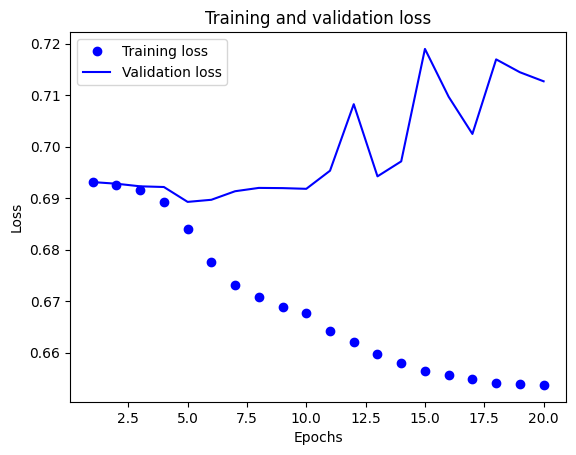

In [31]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Training and validation loss를 그려 보면, 몇 epoch까지의 트레이닝이 적절한지 최적점을 추정해 볼 수 있습니다. validation loss의 그래프가 train loss와의 이격이 발생하게 되면 더 이상의 트레이닝은 무의미해지게 마련입니다.

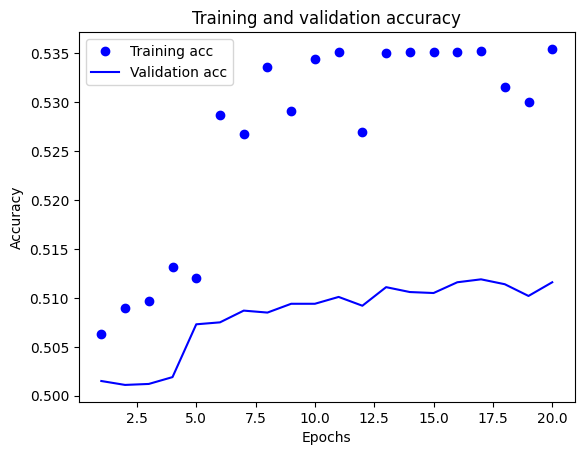

In [32]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 5-10. IMDB 영화리뷰 감성분석 (3) Word2Vec의 적용

이전 스텝에서 라벨링 비용이 많이 드는 머신러닝 기반 감성분석의 비용을 절감하면서 정확도를 크게 향상시킬 수 있는 자연어처리 기법으로 단어의 특성을 저차원 벡터값으로 표현할 수 있는 워드 임베딩(word embedding) 기법이 있다는 언급을 한 바 있습니다.

우리는 이미 이전 스텝에서 워드 임베딩을 사용했습니다. 사용했던 model의 첫 번째 레이어는 바로 Embedding 레이어였습니다. 이 레이어는 우리가 가진 사전의 단어 개수 X 워드 벡터 사이즈만큼의 크기를 가진 학습 파라미터였습니다. 만약 우리의 감성 분류 모델이 학습이 잘 되었다면, Embedding 레이어에 학습된 우리의 워드 벡터들도 의미 공간상에 유의미한 형태로 학습되었을 것입니다. 한번 확인해 봅시다.

이번 스텝부터 워드 벡터 파일을 저장할 디렉터리를 먼저 생성합시다. 그리고 워드 벡터를 다루는데 유용한 gensim 패키지 버전 확인을 합니다.

그리고 word2vec 이론은 아래 내용을 참고 하세요!

word2vec 이론 (https://www.youtube.com/watch?v=sY4YyacSsLc&t=126s)  

Cloud shell에서 아래 명령어를 입력해 주세요.

```
$ mkdir -p ~/aiffel/sentiment_classification/data
$ pip list | grep gensim
```

In [3]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

NameError: name 'model' is not defined